# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda

1. **Introduction to Preprocessing**  
  a. Building block for training data  
  b. Basic Analysis of data and finding out the outliers or incorrect entries.  
  
2. **Range Transformation of Numeric Data**  
  a. MinMaxScaler  
  b. RobustScaler  
  c. Normalization  
  d. Binarization  
  e. Function Transformer  
  
3. **Transforming Categorical Data**  
  a. Encoding Categorical (Ordinal & Nominal) Features  

4. **Imputation of Null Entries**    
  a. Categorical Fields    
  b. Numeric Fields  
  c. Text fields  
   
5. **Encoding Text Data**  
  a. Count Vectorizer  
  b. TFIDF Vectorizer  
  c. Hashing Vectorizer  
  
6. **Introduction to different Domains**  
  a. Images  
  b. Sound  
  b. Text  
  d. Video  
  e. Music  
  f. Web Scrapping  

#### Common import

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. Dealing with Numeric Data.
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation

* If data is not normally distributed, this is not the best scaler to use.

### Questions 
1. Transform the given data (df1) into   
  a. Zero mean and One variance  
  b. 0 min and 1 max  
  c. values should be 1 if 2nd order norm is greater than 10 else 0.
  
2. Make the first row, 1st column of df as 500 and observe transformation for Minmax scalar and Standard scalar. Which one is better? Use robust scalar to transform the range of data.  
  
3. When to use Normalizer and where to not use it? (Hint : Normalizer retains phase info).  
  

In [88]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

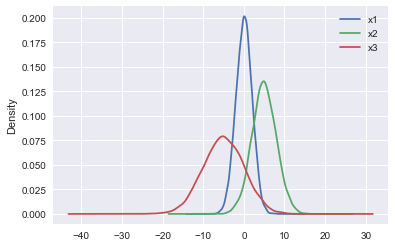

In [89]:
# plotting data

df.plot.kde()

In [90]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [91]:
data_tf = standardscaler.fit_transform(df)

In [92]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

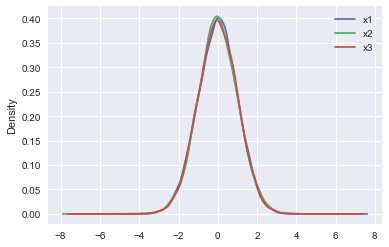

In [93]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [94]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

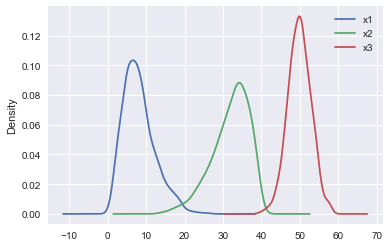

In [95]:
df.plot.kde()

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

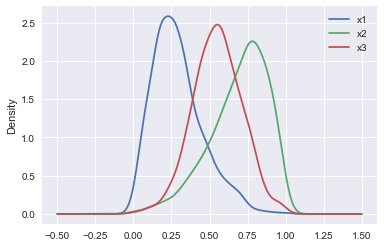

In [98]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [99]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

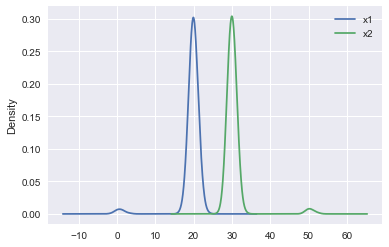

In [100]:
df.plot.kde()

In [101]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [102]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

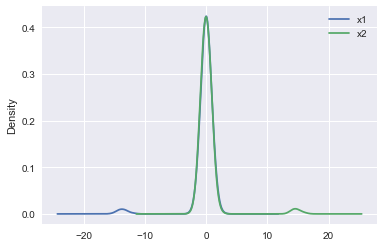

In [103]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [104]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

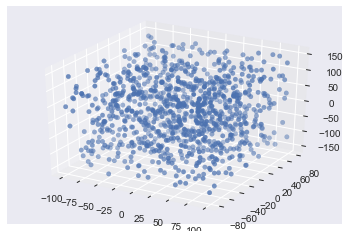

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [106]:
from sklearn.preprocessing import Normalizer

In [107]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [108]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

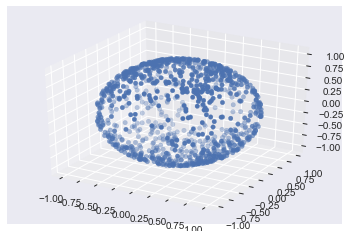

In [109]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [110]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [111]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [112]:
data_tf = binarizer.fit_transform(X)

In [113]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [114]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [115]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [116]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [117]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [118]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [120]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [121]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [122]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [123]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [124]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='mean', axis=1)

In [125]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [4., 4.],
       [7., 5.]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [126]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [127]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [128]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [129]:
from sklearn.preprocessing import FunctionTransformer

In [130]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [131]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [132]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [133]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [134]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [135]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [136]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [137]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'is': 6,
 'mission': 7,
 'one': 8,
 'second': 9,
 'the': 10,
 'third': 11,
 'this': 12}

In [138]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [139]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'one': 7,
 'second': 8,
 'third': 9,
 'this': 10}

In [140]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

In [142]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [143]:
cv.vocabulary_

{'and': 0,
 'and the': 1,
 'awesome': 2,
 'awesome food': 3,
 'document': 4,
 'document awesome': 5,
 'first': 6,
 'first document': 7,
 'food': 8,
 'impossible': 9,
 'is': 10,
 'is mission': 11,
 'is the': 12,
 'is this': 13,
 'mission': 14,
 'mission impossible': 15,
 'one': 16,
 'one the': 17,
 'second': 18,
 'second document': 19,
 'second second': 20,
 'the': 21,
 'the first': 22,
 'the is': 23,
 'the second': 24,
 'the third': 25,
 'third': 26,
 'third one': 27,
 'this': 28,
 'this is': 29,
 'this the': 30}

## 13. TfIdfVectorizer
* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [73]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [74]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [75]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [76]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

![](img/questions-01.png)

### 1. Conceptual Questions
1. I have data consisting of housing area and thier price for prediction in case of Linear Regression.  Which is the kind of re-scaling that I would use and why ?  
2. If I want to compare the distribution of length of leaves of different trees in a forest, then which is the kind of scaling I would use and why?  
3. If I want to classify the leaves of different trees, which scaling would make more sense and why?  
4. If I want to find out of sync phasors/echo in music industry, which scaling would make sense and why?  
  
5. Find out the type of Vectorizer to be used in the bellow examples :  
  a. If I want to find out if a email is spam or not  
  b. If I want to identify the sentement of Twitter feed  
  c. If I want a vectorizer for batchwise document processing  
  
6. Describe the best imputation strategy for the bellow examples :  
  a. If I have salary of employees for past 12 months. Find the abnormalities in data and send me the list of such users with thier name and email address.  
  b. If people have filled Email address instead of name for a few columns. Then correct them.   
  c. Find the possibly incorrect phone numbers .  
  